# Ejercicio de perceptron usando ScikitLearn

In [ ]:
#cargar el dataframe df de https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv esta separada con ","

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv',sep=",")


In [ ]:
df

,edad,colesterol,problema_cardiaco
0,63.0,233.0,1
1,NaN,250.0,0
2,37.0,250.0,0
3,41.0,204.0,0
4,56.0,236.0,1
...,...,...,...
297,63.0,187.0,0
298,63.0,197.0,0
299,59.0,176.0,0
300,57.0,241.0,1


edad                 2
colesterol           2
problema_cardiaco    0
dtype: int64


In [ ]:
#calcular el tamaño del dataframe
df.shape

(302, 3)

In [ ]:
#borrar los nulo *******
df.dropna(inplace=True)

In [ ]:
df.shape

(298, 3)

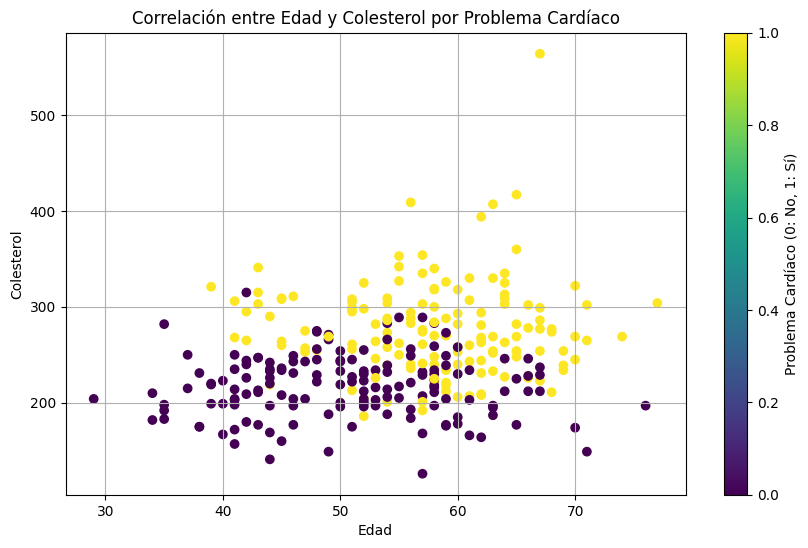

In [ ]:
df.to_csv('cardiaco_limpio.csv', index=False)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,298.0,54.305369,9.084195,29.0,47.25,55.0,61.0,77.0
colesterol,298.0,246.926174,51.685998,126.0,211.25,241.5,275.0,564.0
problema_cardiaco,298.0,0.493289,0.500796,0.0,0.00,0.0,1.0,1.0


In [ ]:
#dividir los features X (edad,colesterol) y la etiqueta y que va a ser problema_cardiaco
X = df[['edad','colesterol']]
y = df['problema_cardiaco']

In [ ]:
# divir los datos entramiento y datos de prueba usando el 80% para entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
X_test

,edad,colesterol
156,39.0,220.0
127,34.0,210.0
190,50.0,233.0
186,50.0,243.0
3,41.0,204.0
171,53.0,203.0
53,66.0,302.0
285,40.0,223.0
54,62.0,231.0
126,39.0,199.0


In [ ]:
# tomar los X_train y normalizar usan min_max entre 0 y 1, y guardar el modelo entrenado usan joblib para futuro uso.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
#guarda scaler con joblib
import joblib
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
X_train_scaled

array([[0.68085106, 0.26712329],
       [0.46808511, 0.23059361],
       [0.72340426, 0.16210046],
       [0.19148936, 0.11187215],
       [0.87234043, 0.44748858],
       [0.42553191, 0.33105023],
       [0.57446809, 0.64611872],
       [0.21276596, 0.21232877],
       [0.44680851, 0.26940639],
       [0.46808511, 0.19863014],
       [0.80851064, 0.23515982],
       [0.74468085, 0.31278539],
       [0.31914894, 0.21461187],
       [0.4893617 , 0.17808219],
       [0.70212766, 0.31278539],
       [0.38297872, 0.28995434],
       [0.31914894, 0.24429224],
       [0.38297872, 0.17808219],
       [0.72340426, 0.13926941],
       [0.59574468, 0.18493151],
       [0.44680851, 0.15981735],
       [0.70212766, 0.26940639],
       [0.89361702, 0.40182648],
       [0.55319149, 0.51826484],
       [0.70212766, 0.35388128],
       [0.61702128, 0.22374429],
       [0.27659574, 0.26027397],
       [0.63829787, 0.21004566],
       [0.72340426, 0.15753425],
       [0.46808511, 0.38584475],
       [0.

In [ ]:
#Normalizar con scaler X_test
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Importar el perceptron de skclearn y entrenar usando X_train_scale
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=42,verbose=True)
clf.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 5.04, NNZs: 2, Bias: -3.000000, T: 238, Avg. loss: 0.223471
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.11, NNZs: 2, Bias: -3.000000, T: 476, Avg. loss: 0.198805
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.24, NNZs: 2, Bias: -4.000000, T: 714, Avg. loss: 0.206133
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.72, NNZs: 2, Bias: -4.000000, T: 952, Avg. loss: 0.192657
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.17, NNZs: 2, Bias: -4.000000, T: 1190, Avg. loss: 0.187045
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 8.43, NNZs: 2, Bias: -4.000000, T: 1428, Avg. loss: 0.173980
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.18, NNZs: 2, Bias: -4.000000, T: 1666, Avg. loss: 0.189624
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.40, NNZs: 2, Bias: -4.000000, T: 1904, Avg. loss: 0.192690
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.19, NNZs: 2, Bias: -4.000000, T: 2142, Avg. loss: 0.184142
Total training time: 0

Perceptron(random_state=42, verbose=True)

In [ ]:
# Consultar información del modelo pertron entrenado
print("Épocas realizadas:", clf.n_iter_)
print("Pesos aprendidos:", clf.coef_)
print("El bias es:", clf.intercept_)
print("Número de características utilizadas:", clf.n_features_in_)

Épocas realizadas: 11
Pesos aprendidos: [[2.82978723 8.59817352]]
El bias es: [-3.]
Número de características utilizadas: 2


In [ ]:
#predecir usando los datos de entrenamiento y encontrar el accuracy
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print("Precisión en el conjunto de entrenamiento:", accuracy)

Precisión en el conjunto de entrenamiento: 0.6890756302521008


In [ ]:
#predecir con los datos prueba y mostrar el accuracy
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.6833333333333333
